# Student Mark Predictor

## Business Problem

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load dataset

In [2]:
df = pd.read_csv('Student_Marks.csv')
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [3]:
df.tail()

,number_courses,time_study,Marks
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027
99,3,6.335,32.357


In [4]:
df.shape

(100, 3)

## Discover the pattern and visulaize the data to gain insights

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
# statistics summary
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


## we will visualize the scatter plot to get realtion between study_hours	student_marks columns

Text(0.5, 1.0, 'Scatter plot of Study Hour vs Student Marks')

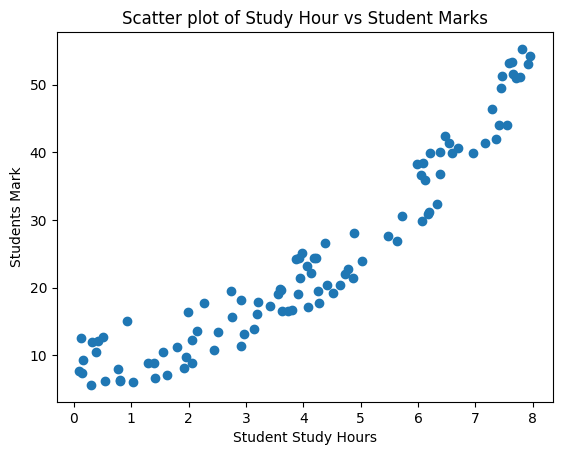

In [7]:
plt.scatter(x = df.time_study, y =	df.Marks)
plt.xlabel('Student Study Hours')
plt.ylabel('Students Mark')
plt.title("Scatter plot of Study Hour vs Student Marks")

In [8]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


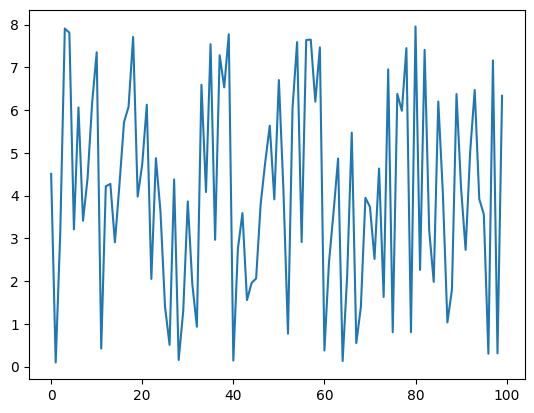

In [9]:
plt.plot(df['time_study'])
plt.show()

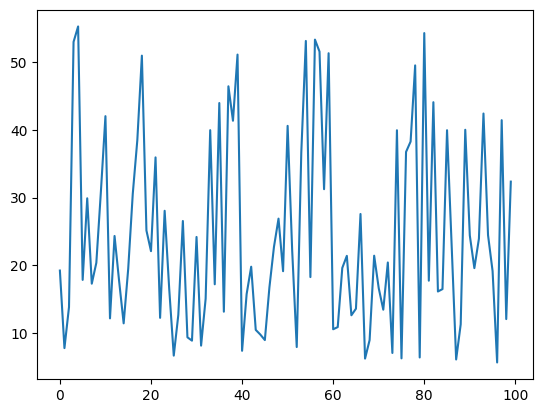

In [10]:
plt.plot(df['Marks'])

## As we can see that this one is strongly correlated.

## prepare the data for machine learning algorithm.

In [11]:
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

## As we can see that There are 5 null values in study hour.
### so we will use mean strategy.

In [12]:
mean = df.mean()
mean

number_courses     5.29000
time_study         4.07714
Marks             24.41769
dtype: float64

In [13]:
df2 = df.fillna(mean)

In [14]:
df2.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [15]:
df2.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [16]:
x = df2.drop("Marks", axis = 'columns')
y = df2['Marks']
print('Shape of x :- ', x.shape)
print('Shape of y :- ', y.shape)

Shape of x :-  (100, 2)
Shape of y :-  (100,)


### Split the dataset in to train and test

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size= 0.20) 
print("shape of x_train :- ", x_train.shape)
print("shape of x_test :- ", x_test.shape)
print("shape of y_train :- ", y_train.shape)
print("shape of y_test :- ", y_test.shape)

shape of x_train :-  (80, 2)
shape of x_test :-  (20, 2)
shape of y_train :-  (80,)
shape of y_test :-  (20,)


## There is only 1 independent variable so we will use Linear Regression

In [18]:
x_train.head()

,number_courses,time_study
43,5,1.557
62,6,3.606
3,6,7.909
71,5,2.518
45,3,2.061


In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [20]:
# fit the model
lr.fit(x_train, y_train)

LinearRegression()

In [21]:
lr.coef_

array([1.81180449, 5.39453433])

In [22]:
lr.intercept_

-6.887034877371768

In [23]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


<Axes: >

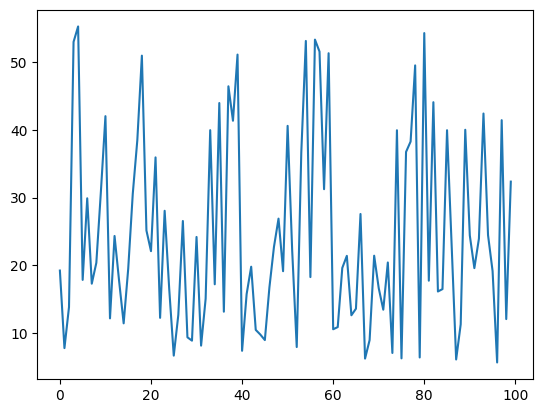

In [24]:
df['Marks'].plot()

In [25]:
df[df.Marks > 50]

,number_courses,time_study,Marks
3,6,7.909,53.018
4,8,7.811,55.299
18,6,7.711,50.986
39,6,7.775,51.142
54,8,7.591,53.158
56,8,7.641,53.359
57,7,7.649,51.583
59,8,7.468,51.343
80,7,7.957,54.321


In [26]:
m1 = 1.81180449
m2 = 5.39453433
c = -6.887034877371768
y = m1 * 5 + m2* 18 + c
y

99.27360551262822

In [27]:
lr.predict([[2,9]]).round(2)

c:\Users\AkshatRaj\End to end Projects\Student mark predictor\.mark_prediction\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45.29])

In [28]:
y_pred = lr.predict(x_test)
y_pred

array([ 8.53602   , 27.7351677 , 17.26125916, 21.50987508,  2.88018967,
       42.51543273, 33.02332944,  7.33607503, 48.55731119, 23.19372884,
       38.42713475, 27.47850719, 45.99027189, 21.60461834, 20.58353326,
       28.45188172, 13.2361775 , 19.96931539, 39.55535147, 24.1500795 ])

In [29]:
df.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

In [30]:
pd.DataFrame(np.c_[x_test, y_test, y_pred], columns = ['number_courses','time_study', 'student_marks_original', 'student_marks_prediction'])

,number_courses,time_study,student_marks_original,student_marks_prediction
0,7.0,0.508,12.647,8.536020
1,7.0,4.067,23.149,27.735168
2,4.0,3.133,13.811,17.261259
3,7.0,2.913,18.238,21.509875
4,3.0,0.803,6.217,2.880190
5,8.0,6.471,42.426,42.515433
6,5.0,5.719,30.548,33.023329
7,3.0,1.629,7.014,7.336075
8,8.0,7.591,53.158,48.557311
9,6.0,3.561,19.128,23.193729


## Tune your model

In [31]:
lr.score(x_test, y_test)

0.9379348542894724

In [36]:
x_train

,number_courses,time_study
43,5,1.557
62,6,3.606
3,6,7.909
71,5,2.518
45,3,2.061
...,...,...
96,3,0.301
67,3,0.550
64,7,0.130
47,4,4.779


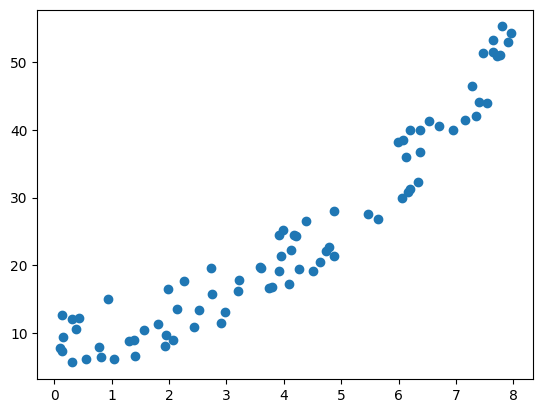

In [37]:
plt.scatter(x_train['time_study'], y_train)

In [40]:
# plt.scatter(x_test['time_study'], y_test)
# plt.plot(x_train['time_study'], lr.predict(x_train), color = 'r')

# Save your Model

In [41]:
import joblib
joblib.dump(lr, 'multiple_student_mark_prediction.pkl')

['multiple_student_mark_prediction.pkl']

In [42]:
model = joblib.load('multiple_student_mark_prediction.pkl')

In [43]:
model.predict([[3, 5]])

c:\Users\AkshatRaj\End to end Projects\Student mark predictor\.mark_prediction\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.52105027])

In [45]:
model.predict([[5, 12]])

c:\Users\AkshatRaj\End to end Projects\Student mark predictor\.mark_prediction\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([66.9063996])

In [46]:
df['number_courses'].max(), df['number_courses'].min()

(8, 3)

In [47]:
df.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

In [52]:
input_features = np.array([df['time_study'], df['Marks']])
input_features

array([[ 4.508,  0.096,  3.133,  7.909,  7.811,  3.211,  6.063,  3.413,
         4.41 ,  6.173,  7.353,  0.423,  4.218,  4.274,  2.908,  4.26 ,
         5.719,  6.08 ,  7.711,  3.977,  4.733,  6.126,  2.051,  4.875,
         3.635,  1.407,  0.508,  4.378,  0.156,  1.299,  3.864,  1.923,
         0.932,  6.594,  4.083,  7.543,  2.966,  7.283,  6.533,  7.775,
         0.14 ,  2.754,  3.591,  1.557,  1.954,  2.061,  3.797,  4.779,
         5.635,  3.913,  6.703,  4.13 ,  0.771,  6.049,  7.591,  2.913,
         7.641,  7.649,  6.198,  7.468,  0.376,  2.438,  3.606,  4.869,
         0.13 ,  2.142,  5.473,  0.55 ,  1.395,  3.948,  3.736,  2.518,
         4.633,  1.629,  6.954,  0.803,  6.379,  5.985,  7.451,  0.805,
         7.957,  2.262,  7.41 ,  3.197,  1.982,  6.201,  4.067,  1.033,
         1.803,  6.376,  4.182,  2.73 ,  5.027,  6.471,  3.919,  3.561,
         0.301,  7.163,  0.309,  6.335],
       [19.202,  7.734, 13.811, 53.018, 55.299, 17.822, 29.889, 17.264,
        20.348, 30.862,

In [54]:
# model.predict([input_features])